# 1- Train the models

In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
from get_utils import return_ignore

In [2]:
trainall = 1
network_siz = 128
n_networks = 5
train_random = 0 
start_again = 1

!python ../model.py {trainall} {network_siz} {n_networks} {train_random} {start_again}

model00...
model01...
model02...
model03...
model04...
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
Training growing_up:   0%|                         | 0/20010 [00:00<?, ?batch/s]skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
Training growing_up:   0%|                         | 0/20010 [00:00<?, ?batch/s]skipping cudagraphs for unknown reason
skipping cudagraphs for unknown reason
skipp

# Plot things

In [9]:
#%matplotlib qt
#%matplotlib widget
%matplotlib inline

fontsize_label = 18
fontsize_tick = 15
fontsize_legend = 20

palette_colors = {'FF1': 'g', 'FF2': (0.4,0.4,0.8), 'NF1': 'k', 'NF2': 'k'}


base_dir = os.path.join(os.path.expanduser('~'),'Documents','Data','MotorNet')
save_fig = '/Users/mahdiyar/Diedrichsenlab Dropbox/Mahdiyar Shahbazi/Conferences/NCM2024_Mahdiyar/figures'

In [23]:
# general info
folder_name = 'Sim_simp_64'
num_model = 40

ignore = return_ignore(folder_name, num_model)


phases = {'NF1':[0],'FF1':[8],'NF2':[0],'FF2':[8]}

In [24]:
from get_utils import get_loss
from plot import plot_learning
import matplotlib.pyplot as plt


# Load loss
loss_type = 'lateral'
loss = get_loss(folder_name,num_model,phases,loss_type=loss_type,w=1,target=None,ignore=ignore)



# Plot learning
fig, ax = plot_learning(loss,figsize=(10,5),show_saving=False,gap=5000,palette_colors=palette_colors)


ax[0].set_xlabel('# Batches', fontsize = fontsize_label)
ax[0].set_ylabel('Lateral deviation [mm]', fontsize = fontsize_label)
ax[0].legend(title = '',frameon = False, bbox_to_anchor= (1,1), fontsize=fontsize_legend)
ax[0].legend().set_visible(False)
ax[0].xaxis.set_tick_params(labelsize=fontsize_tick)
ax[0].yaxis.set_tick_params(labelsize=fontsize_tick)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.tick_params(left = False) 

plt.tight_layout()
plt.show()
#fig.savefig(os.path.join(save_fig,'learnings.pdf'),dpi=300,bbox_inches='tight')

# Barplots for savings

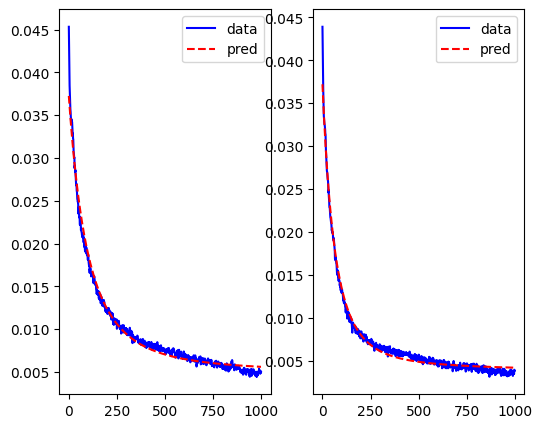

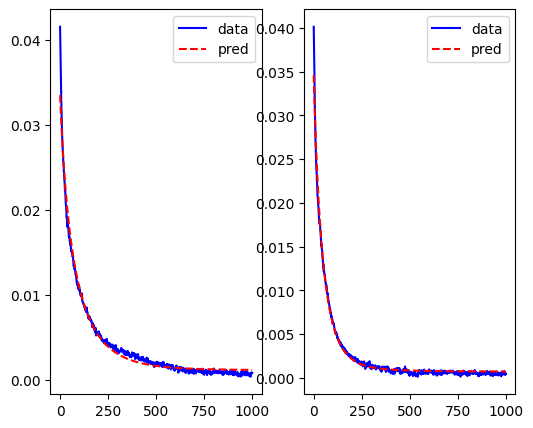

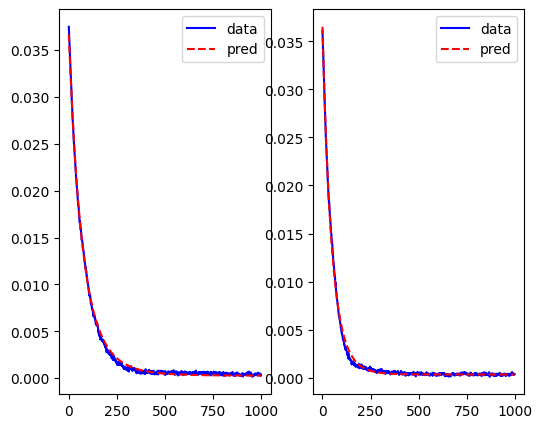

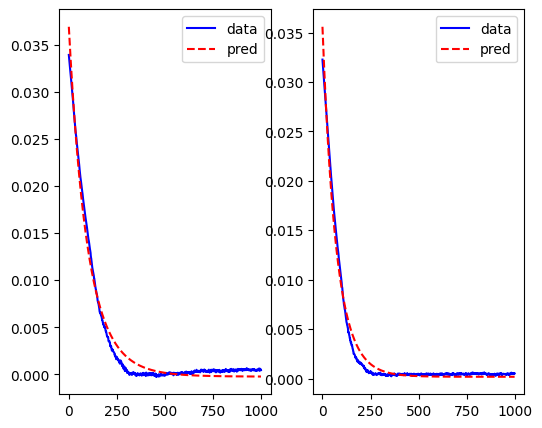

In [7]:
from utils import init_and_rate
num_model = 20
folder_name_init = 'Sim_all'
D = init_and_rate(folder_name_init,[16,32,64,128],num_model,loss_type='lateral',check_fit=True)
D.to_csv(base_dir+'/loss.csv',index=False)

Text(0, 0.5, 'Lateral deviation [mm]')

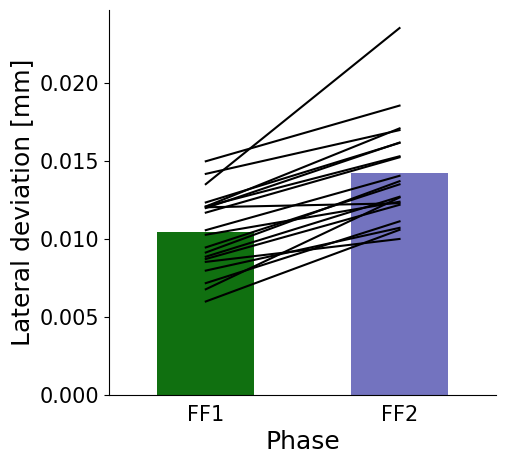

In [22]:
# plot saving for FF1 and FF2
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


D = pd.read_csv(base_dir+'/loss.csv')

filter_condition = (
    (D['phase'].isin(['FF1', 'FF2'])) &
    (D['size'] == 128) &
    (D['feature'] == 'rate') # you can select 'init' or 'rate'
)
T = D[filter_condition].reset_index(drop=True)

# plot 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for id, data in T.groupby('mn'):
    ff1_value = data[data['phase'] == 'FF1']['value'].values[0]
    ff2_value = data[data['phase'] == 'FF2']['value'].values[0]
    ax.plot(['FF1', 'FF2'], [ff1_value, ff2_value], color='k')


sb.barplot(x='phase', y='value', data=T, hue='phase', width=0.5, ax=ax, palette=palette_colors,errorbar=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.tick_params(bottom=False)
ax.set_xlabel('Phase', fontsize=fontsize_label)
ax.set_ylabel('Lateral deviation [mm]', fontsize=fontsize_label)

#ax.set_ylim([32, 41])  # Adjust based on your data
#ax.set_ylim([0.025, 0.04])
#ax.set_yticks([0.025, 0.03, 0.035, 0.04])
#fig.savefig(os.path.join(save_fig, 'saving_batch0_lat_neg.pdf'), dpi=300, bbox_inches='tight')

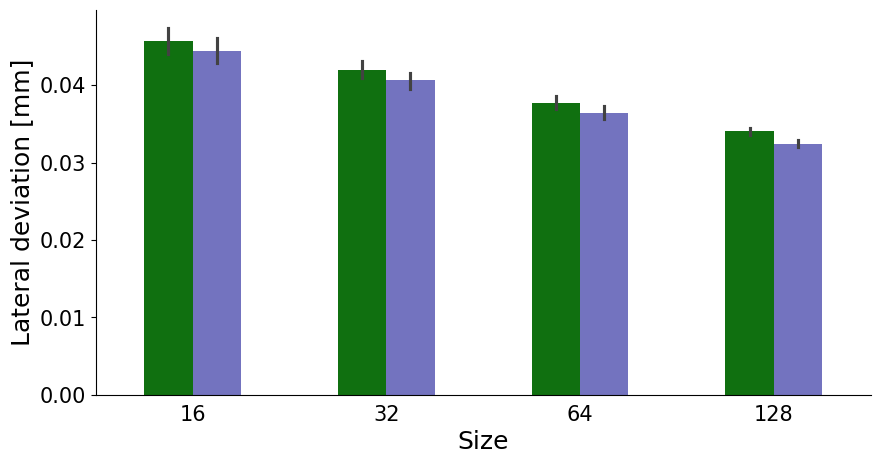

In [25]:
D = pd.read_csv(base_dir+'/loss.csv')

filter_condition = (
    (D['phase'].isin(['FF1', 'FF2'])) &
    (D['feature'] == 'init') # you can select 'init' or 'rate'
)
T = D[filter_condition].reset_index(drop=True)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))



sb.barplot(x='size', y='value', data=T, hue='phase', width=0.5, ax=ax, palette=palette_colors) # ,errorbar=None


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.tick_params(bottom=False)
ax.set_xlabel('Size', fontsize=fontsize_label)
ax.set_ylabel('Lateral deviation [mm]', fontsize=fontsize_label)

#ax.set_ylim([0.03, 0.045])
#ax.set_yticks([0.03,0.035, 0.04,0.045])
ax.legend().set_visible(False)


#fig.savefig(os.path.join(save_fig, 'perf_vs_size.pdf'), dpi=300, bbox_inches='tight')

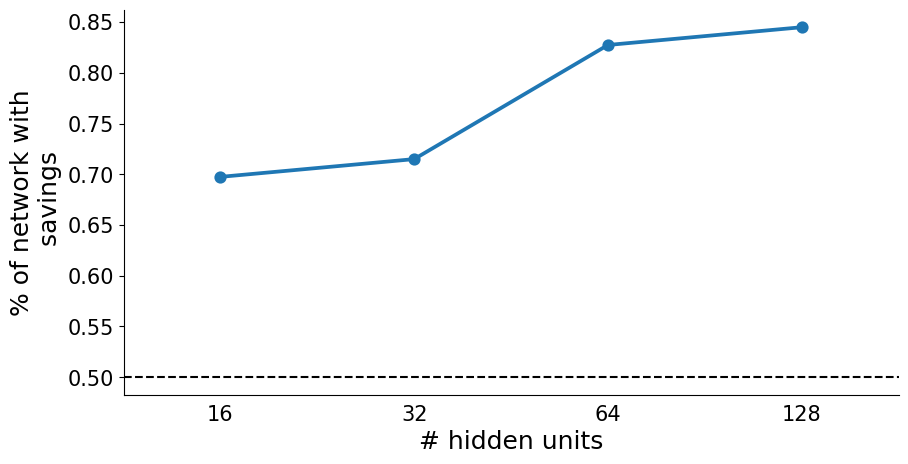

In [28]:
D = pd.read_csv(base_dir+'/loss.csv')

filter_condition = (
    (D['phase'].isin(['FF1', 'FF2'])) &
    (D['feature'] == 'rate') # you can select 'init' or 'rate'
)
T = D[filter_condition].reset_index(drop=True)



ff1_data = T[T['phase']=='FF1']
ff2_data = T[T['phase']=='FF2']


merged_data = pd.merge(ff1_data,ff2_data,on='size',suffixes=('_ff1', '_ff2'))

# Calculate the difference in 'loss'
merged_data['loss_difference'] = (merged_data['value_ff2']-merged_data['value_ff1']>0) #& (merged_data2['value_ff2']-merged_data2['value_ff1']>0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sb.pointplot(x='size', y='loss_difference', data=merged_data, ax=ax,errorbar=None) #,errorbar=None

ax.axhline(0.5, color='black', linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.tick_params(bottom = False) 
ax.set_xlabel('# hidden units', fontsize = fontsize_label)
ax.set_ylabel('% of network with\n savings', fontsize = fontsize_label)

plt.show()


#fig.savefig(os.path.join(save_fig,'saving_vs_size.pdf'),dpi=300,bbox_inches='tight')